In [1]:
import numpy as np

In [33]:
class MLP:
    def __init__(self, layers, init = 'random', out_activation='sigmoid'):
        
        # Save everything to analyse later
        self.layers = layers
        self.weights = []
        self.bias = []
        self.activations = []
        self.z_list = []
        
        self.out_activation = out_activation
        
        if init == 'xavier':
            self.xavier_initialization()
        elif init == 'he':
            self.he_initialization()
        else:
            self.random_initialization()
    
    def forward_pass(self, a):
        z_list = []
        activations = [a] # activation also include inputs so we can use it later
        for i in range(len(self.layers)-2):
            z = np.matmul(self.weights[i], a) + self.bias[i] # z(l,1) = W(l,l-1)*a(l-1,1) + b(l,1)
            a = self.sigmoid(z) # a(l,1)
            z_list.append(z)
            activations.append(a)
        
        # For last layer
        z = np.matmul(self.weights[len(self.layers)-2], a) + self.bias[len(self.layers)-2] # z(l,1) = W(l,l-1)*a(l-1,1) + b(l,1)
        if self.out_activation == 'sigmoid':
            a = self.sigmoid(z) # a(l,1)
        if self.out_activation == 'linear':
            a = self.sigmoid(z) # a(l,1)
        z_list.append(z)
        activations.append(a)
        
        self.z_list = z_list
        self.activations = activations
        return activations
    
    def backward_pass(self, target, learning_rate):
        
        # First the output layer calculations to get del_l, this will be passed backwards
        output = self.activations[-1][0][0]
        if self.out_activation == 'sigmoid':
            loss, del_loss_out = self.cross_entropy_loss(target, output)
        if self.out_activation == 'linear':
            loss, del_loss_out = self.mse_loss(target, output)
        del_l = del_loss_out * self.sigmoid_derivative(self.z_list[-1]) # del_l(1,1)
        
        # Update weights
        for layer in range(len(self.layers)-1,0,-1):
            
            del_w = np.matmul(del_l, self.activations[layer-1].T) # del_w(l,l-1) = del_l(l,1)*a(l-1,1).T = del_l(l,1)*a(1,l-1)
            del_b = del_l # del_b(l,1) = del_l(l,1)
            
            # [layer-1] because if layers in length n, then weights are length n-1
            self.weights[layer-1] -= learning_rate * del_w
            self.bias[layer-1] -= learning_rate * del_b
            
            # del_l for previous layer, del_l(l-1, 1) = weights(l, l-1).T*del_l(l,1) ** derivative(l-1)
            del_l = np.matmul(self.weights[layer-1].T, del_l) * self.sigmoid_derivative(self.z_list[layer-2])
        return loss
    
    # Print functions
    def get_weights(self):
        for i in range(len(self.weights)):
            print(f'=============Layer {i+1} Weights================')
            print(f'Weights: {self.weights[i]} {self.weights[i].shape}')
            print(f'Bias: {self.bias[i]} {self.bias[i].shape}')
    
    def get_activations(self):
        print(f'=============Input ================')
        print(f'Weights: {self.activations[0]} {self.activations[0].shape}')
        for i in range(1, len(self.activations)):
            print(f'=============Layers {i} activations================')
            print(f'Weights: {self.activations[i]} {self.activations[i].shape}')
            
    def get_z_values(self):
        for i in range(len(self.z_list)):
            print(f'=============Layers {i+1} z values================')
            print(f'Weights: {self.z_list[i]} {self.z_list[i].shape}')
    
    # Utility functions
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    def cross_entropy_loss(self, target, output):
        loss = -target*np.log(output) -(1-target)*np.log(1-output)
        d_loss_out = (output - target)/(output - output**2)
        return loss, d_loss_out
    
    def mse_loss(self, target, output):
        loss = (target-output)**2
        d_loss_out = -2*(target - output)
        return loss, d_loss_out
    
    # Initialize parameters with random values
    # Weight Shape = [l, l-1]
    # We do layers[i+1] because layers also has input size in it
    def random_initialization(self):
        for i in range(len(self.layers)-1):
            self.weights.append(np.random.random([self.layers[i+1], self.layers[i]]))
            self.bias.append(np.random.random([self.layers[i+1], 1]))
    
    def xavier_initialization(self):
        for i in range(len(self.layers)-1):
            self.weights.append(np.random.normal(0, scale=1/self.layers[i], size=(self.layers[i+1], self.layers[i])))
            self.bias.append(np.zeros([self.layers[i+1],1]))
    
    def he_initialization(self):
        for i in range(len(self.layers)-1):
            self.weights.append(np.random.normal(0, scale=2/self.layers[i], size=(self.layers[i+1], self.layers[i])))
            self.bias.append(np.zeros([self.layers[i+1],1]))

In [52]:
# mlp = MLP([2,3,1], 'random', 'sigmoid')
# inputs = np.array([[0,0],[1,0],[0,1],[1,1]])
# targets = np.array([0,0,0,1])

# mlp = MLP([3,3,1], 'random', 'linear')
# inputs = np.array([[0,0,0],[0,0,1],[1,0,0],[0,1,0],[1,0,1],[0,1,1],[1,1,0],[1,1,1]])
# targets = np.array([0,0.3,0.3,0.3,0.8,0.8,0.8,1])

def function(x):
    return (np.cos(x[0]*2*np.pi)) + (np.sin(x[1]*2*np.pi))
X = 2*(np.random.random([200, 2]) - 0.5)
y = np.array([function(x) for x in X])
mlp = MLP([2,3,1], 'random', 'linear')

epochs = 50
learning_rate = 0.05

losses = []
for _ in range(epochs):
    epoch_loss = 0
    for inp, target in zip(inputs, targets):
        inp = inp.reshape(-1,1)
        print(inp.shape)
        activations = mlp.forward_pass(inp)
        loss = mlp.backward_pass(target, learning_rate)
        epoch_loss += loss
    losses.append(epoch_loss)

# mlp.get_weights()
# mlp.get_activations()
# mlp.get_z_values()

(3, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

Text(0.5, 0, 'Epoch')

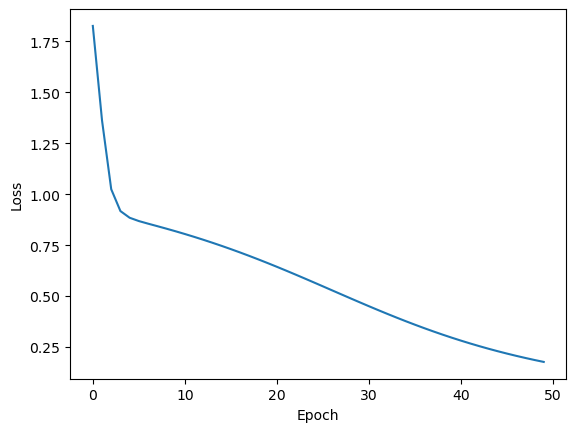

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [4]:
for inp in inputs:
    inp = inp.reshape(-1,1)
    activations = mlp.forward_pass(inp)
    activations = mlp.forward_pass(inp)
    output = activations[-1]
    print(f'For input {inp.reshape(1,-1)[0]}: {output[0][0]:.2f}')

For input [0 0 0]: 0.07
For input [0 0 1]: 0.29
For input [1 0 0]: 0.29
For input [0 1 0]: 0.29
For input [1 0 1]: 0.80
For input [0 1 1]: 0.81
For input [1 1 0]: 0.81
For input [1 1 1]: 0.95
